Importing necessary **Libraries** 

In [1]:
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile,join

Using TensorFlow backend.


**-** Setting **image height** and **image width**

**-** Setting the **paths** for the directories

**-** Setting the **image shape** according to the **backend**


In [0]:
img_width  = 150
img_height = 150

train_data_dir = 'drive/My Drive/cats_dogs/train'
validation_data_dir = 'drive/My Drive/cats_dogs/validation'
test_data_dir = 'drive/My Drive/cats_dogs/test'

batch_size=20

if K.image_data_format()=='channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

**-** building the **model**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

**Model Structure**

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

Performing **Image Augmentation**

---


Deep networks need large amount of training data to achieve good performance. To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

---



---
**Before Augmentataion**

![**Before Augmentation**](https://miro.medium.com/max/940/1*Kjx-CunaKZ267ljICtmSsA.jpeg)



---
**After Augmentataion**

![**After Augmentation**](https://miro.medium.com/max/732/1*5RXJ2OlVJp4_sd1XzhK6pQ.png)

---


[**Click here to read more about image augmentation**](https://towardsdatascience.com/image-augmentation-for-deep-learning-histogram-equalization-a71387f609b2)


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [0]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode = 'binary'
)

Found 600 images belonging to 2 classes.


In [0]:
test_generator = ImageDataGenerator().flow_from_directory(
    test_data_dir,
    target_size=(img_width,img_height),
    batch_size=10,
    classes = ['cats','dogs']
)

Found 20 images belonging to 2 classes.


**Compiling the model** 

---
**Binary crossentropy** is used on yes/no decisions, e.g., multi-label classification. The loss tells you how wrong your model’s predictions are. For instance, in multi-label problems, where an example can belong to multiple classes at the same time, the model tries to decide for each class whether the example belongs to that class or not.

**Adam** is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data

In [0]:
import keras
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

Training The MODEL with 100 epochs

---
**Epoch** is nothing but a hyperparameter that,in simple terms, iteration constituting one forward pass and one backward pass (preferably in neural network).
Since Epoch cannot be applied to a very large dataset, it is divided to form a batches . Iteration is the number of batches needed to complete one epoch.

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs=100,
    validation_data = validation_generator,
    validation_steps = 25
)

Epoch 1/100
50/50 [==============================] - 571s 11s/step - loss: 0.7023 - accuracy: 0.5110 - val_loss: 0.6914 - val_accuracy: 0.5320
Epoch 2/100
50/50 [==============================] - 335s 7s/step - loss: 0.6936 - accuracy: 0.5170 - val_loss: 0.6876 - val_accuracy: 0.4940
Epoch 3/100
50/50 [==============================] - 9s 175ms/step - loss: 0.6911 - accuracy: 0.5260 - val_loss: 0.6833 - val_accuracy: 0.6180
Epoch 4/100
50/50 [==============================] - 9s 178ms/step - loss: 0.6971 - accuracy: 0.5440 - val_loss: 0.6836 - val_accuracy: 0.4920
Epoch 5/100
50/50 [==============================] - 9s 179ms/step - loss: 0.6907 - accuracy: 0.5140 - val_loss: 0.6857 - val_accuracy: 0.6120
Epoch 6/100
50/50 [==============================] - 9s 179ms/step - loss: 0.6841 - accuracy: 0.5700 - val_loss: 0.6837 - val_accuracy: 0.6180
Epoch 7/100
50/50 [==============================] - 9s 180ms/step - loss: 0.6701 - accuracy: 0.6000 - val_loss: 0.6494 - val_accuracy: 0.6420


**Plotting the Graphs**

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


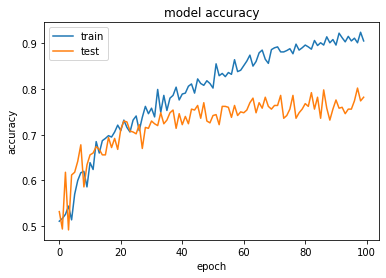

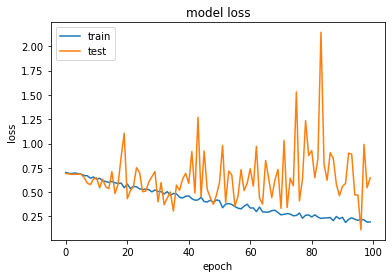

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import numpy as np
from os import listdir
from os.path import isfile,join

predict_cats_dir_path='drive/My Drive/cats_dogs/test/cats/'
predict_dogs_dir_path='drive/My Drive/cats_dogs/test/dogs/'

only_cat_files = [f for f in listdir(predict_cats_dir_path) if isfile(join(predict_cats_dir_path, f))]
only_dog_files = [f for f in listdir(predict_dogs_dir_path) if isfile(join(predict_dogs_dir_path, f))]

only_files = only_cat_files+only_dog_files
print(only_files)

['cat.4995.jpg', 'cat.4993.jpg', 'cat.4999.jpg', 'cat.4997.jpg', 'cat.4994.jpg', 'cat.4996.jpg', 'cat.5000.jpg', 'cat.4992.jpg', 'cat.4991.jpg', 'cat.4998.jpg', 'dog.4994.jpg', 'dog.4995.jpg', 'dog.4997.jpg', 'dog.5000.jpg', 'dog.4991.jpg', 'dog.4993.jpg', 'dog.4999.jpg', 'dog.4996.jpg', 'dog.4992.jpg', 'dog.4998.jpg']


Making predictions for the **Test Dataset**

In [0]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in only_cat_files:
    img = image.load_img(predict_cats_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1

for file in only_dog_files:
    img = image.load_img(predict_dogs_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1

print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

cat.4995.jpg: dog
cat.4993.jpg: cat
cat.4999.jpg: cat
cat.4997.jpg: dog
cat.4994.jpg: cat
cat.4996.jpg: dog
cat.5000.jpg: cat
cat.4992.jpg: dog
cat.4991.jpg: cat
cat.4998.jpg: cat
dog.4994.jpg: cat
dog.4995.jpg: dog
dog.4997.jpg: dog
dog.5000.jpg: dog
dog.4991.jpg: dog
dog.4993.jpg: dog
dog.4999.jpg: dog
dog.4996.jpg: dog
dog.4992.jpg: dog
dog.4998.jpg: dog
Total Dogs : 13
Total Cats : 7


**Saving the Model**

In [0]:
model.save('cats_and_dogs.h5')

Plotting the **Confusion Matrix**

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [0]:
def plots(ims, figsize=(12,6), rows=1, Interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8) 
    if (ims.shape[-1] != 3):
      ims = ims. transpose (2,2,3,1) 
  f=plt.figure(figsize=figsize) 
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
  for i in range(len(ims)):
    sp= f.add_subplot(rows, cols, i+1) 
    sp.axis('Off') 
    if titles is not None:
      sp.set_title(titles[i], fontsize=16) 
    plt.imshow(ims[i], interpolation=None if Interp else 'none')

In [0]:
imgs,labels = next(test_generator)

In [0]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


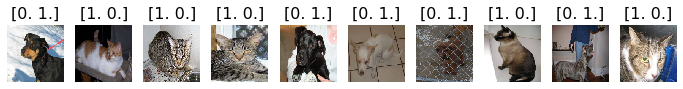

In [0]:
plots(imgs,titles=labels)

In [0]:
labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
labels=labels[:,1]

In [0]:
labels

array([1., 0., 0., 0., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_generator,steps=1,verbose=0)

In [0]:
predictions

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [0]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(labels,predictions)

confusion matrix, without normalization
[[3 2]
 [0 5]]


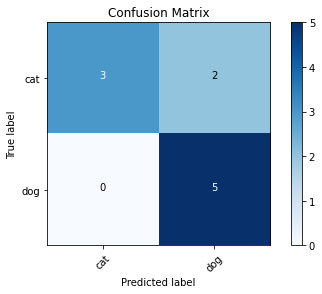

In [0]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

**Calculating Accuracy**

In [0]:
sum_pred = cm[0][0]+cm[1][1]
total = len(labels)
accuracy = sum_pred/total * 100
print(accuracy)

80.0
